<a href="https://colab.research.google.com/github/amishra15/Customer-Churn-For-Bank-Analysis-and-Prediction/blob/main/Customer_Churn_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
from google.colab import files

# Upload CSV file
#uploaded = files.upload()

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the name of your CSV file
df = pd.read_csv('churn.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### EDA

In [11]:
# Overview of the data
print("Dataset Overview")
print("Shape of the dataset:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFirst few rows of the dataset:\n", df.head())


Dataset Overview
Shape of the dataset: (10000, 14)

Column Names:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Data Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

First few rows of the dataset:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502

In [12]:
# Statistical Summary
print("\nStatistical Summary:\n", df.describe())
print("\nSummary of Categorical Variables:\n", df.describe(include=['object']))


Statistical Summary:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
mi

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
# Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

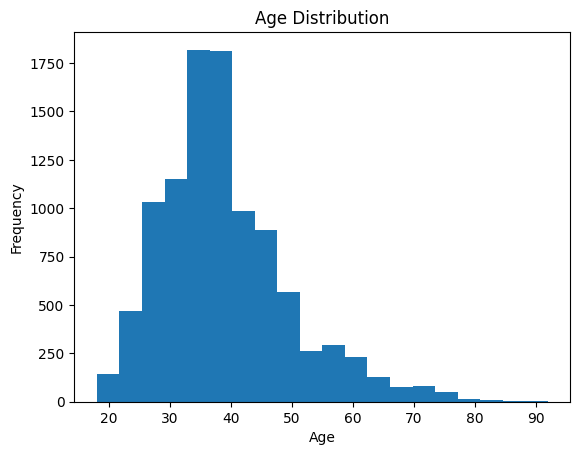

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

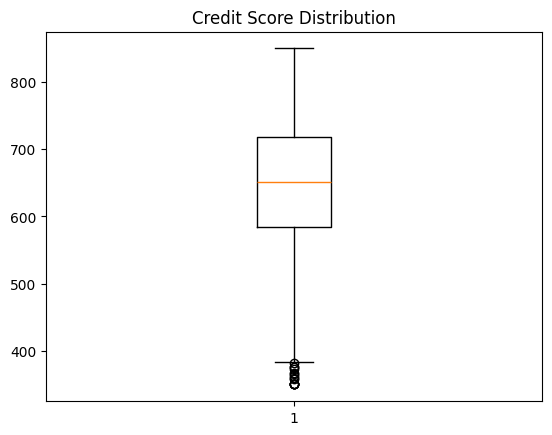

In [7]:
plt.boxplot(df['CreditScore'])
plt.title('Credit Score Distribution')
plt.show()

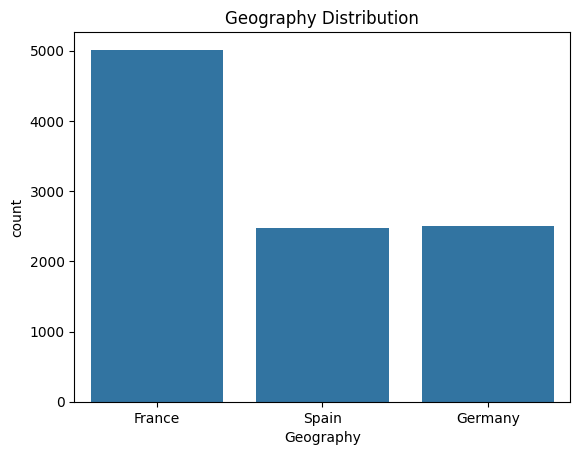

In [9]:
# visualizations
import seaborn as sns

# Bar chart for Geography distribution
sns.countplot(data=df, x='Geography')
plt.title('Geography Distribution')
plt.show()

In [10]:
geography_counts = df['Geography'].value_counts().reset_index()
geography_counts.columns = ['Geography', 'Count']
geography_counts

,Geography,Count
0,France,5014
1,Germany,2509
2,Spain,2477


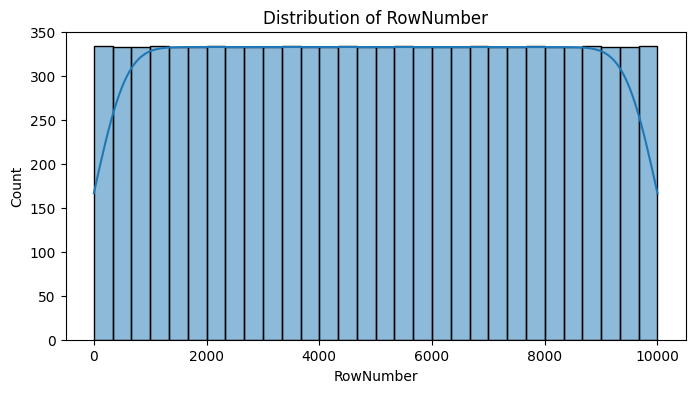

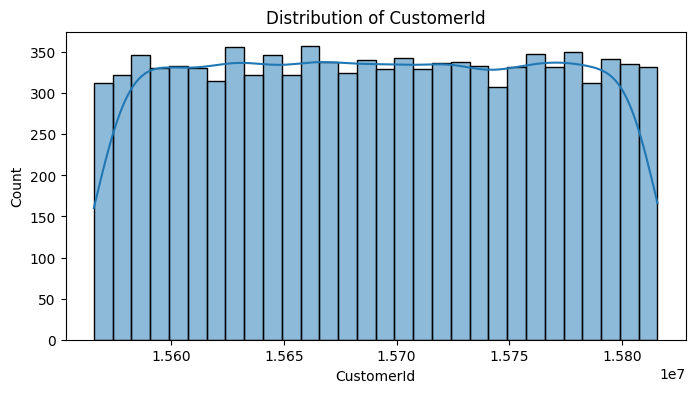

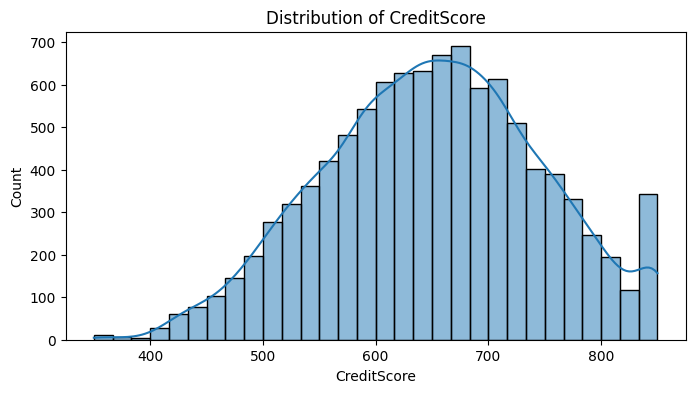

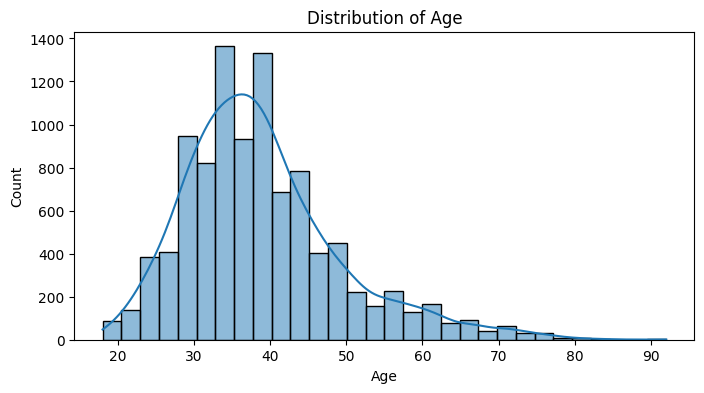

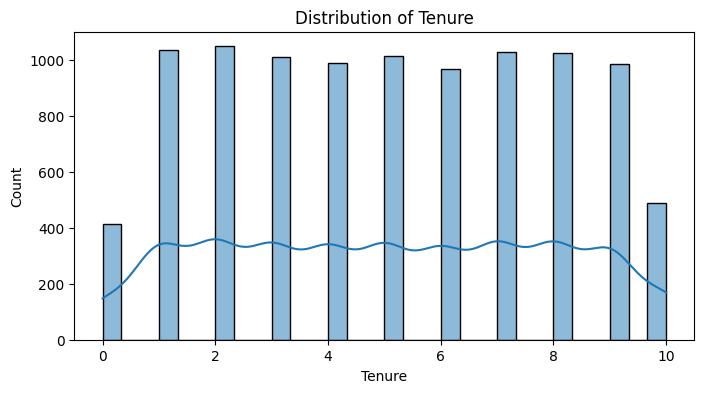

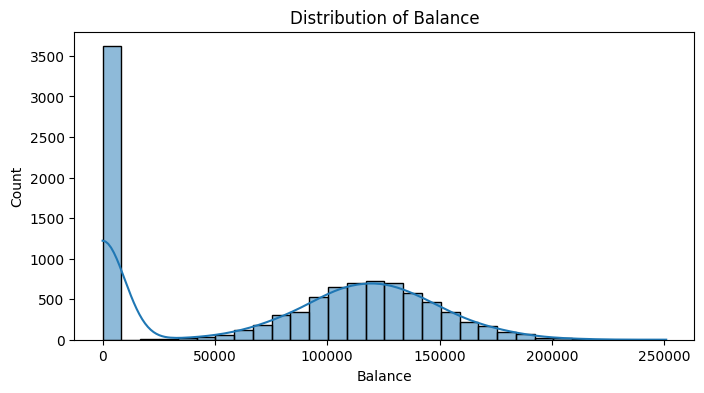

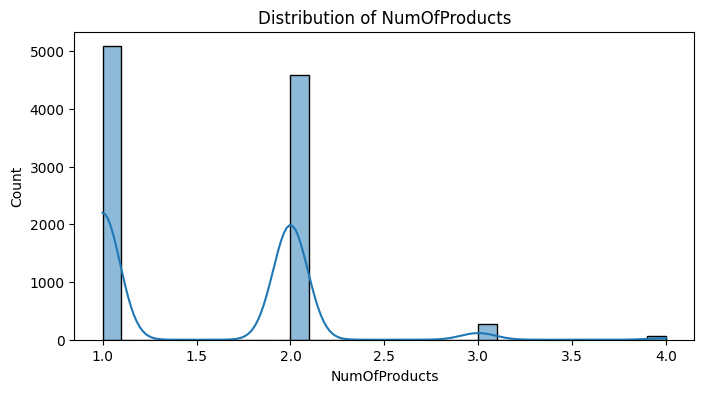

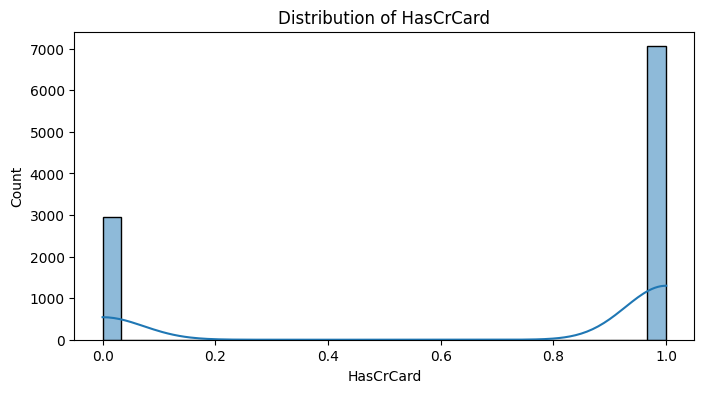

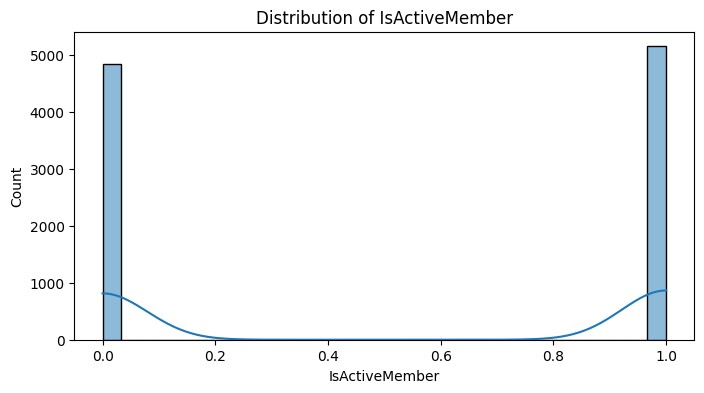

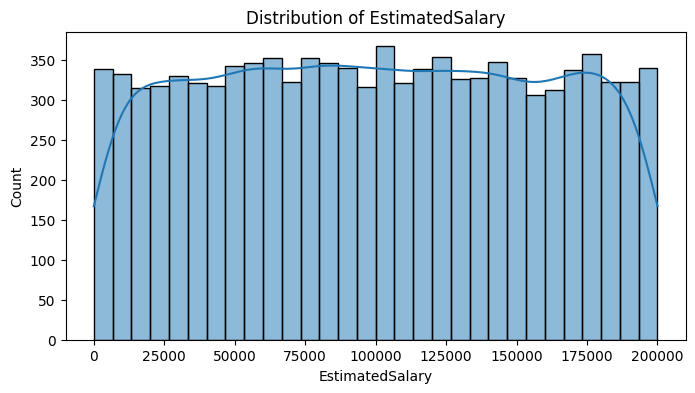

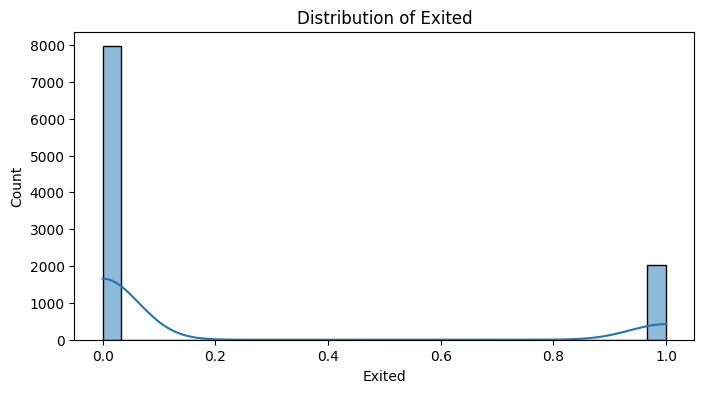

In [13]:
# Plot distributions of numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

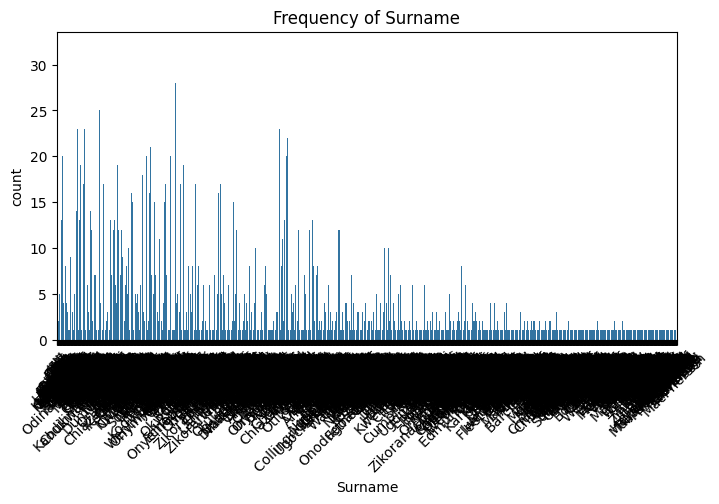

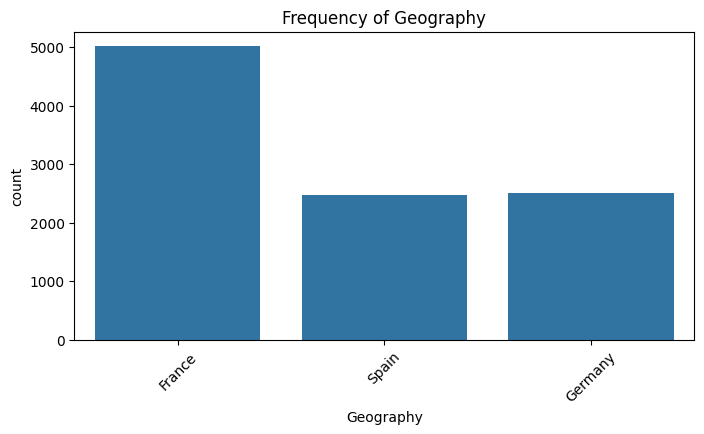

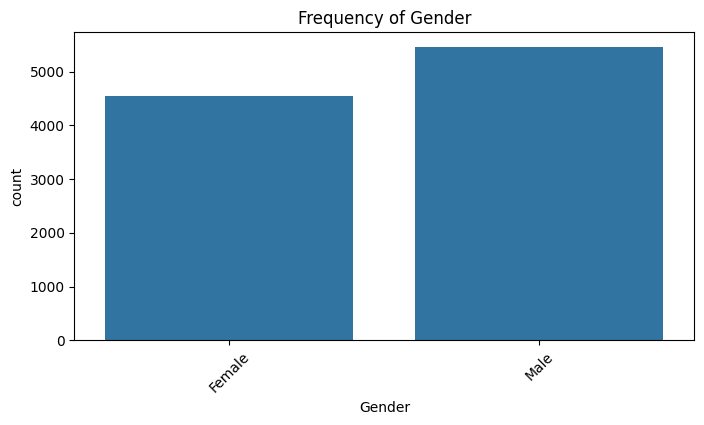


Bivariate Analysis


In [14]:
# Frequency of categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis
print("\nBivariate Analysis")

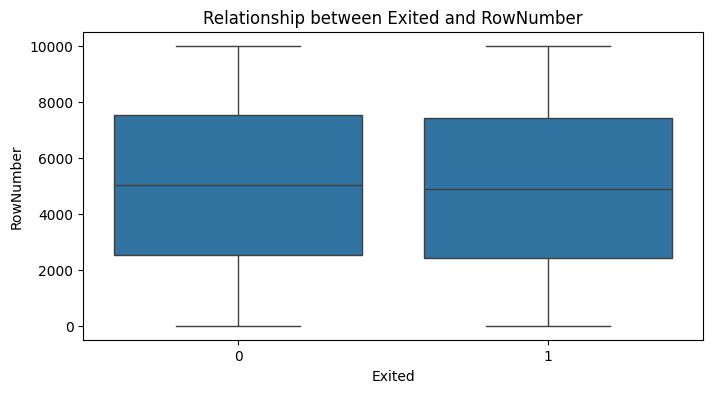

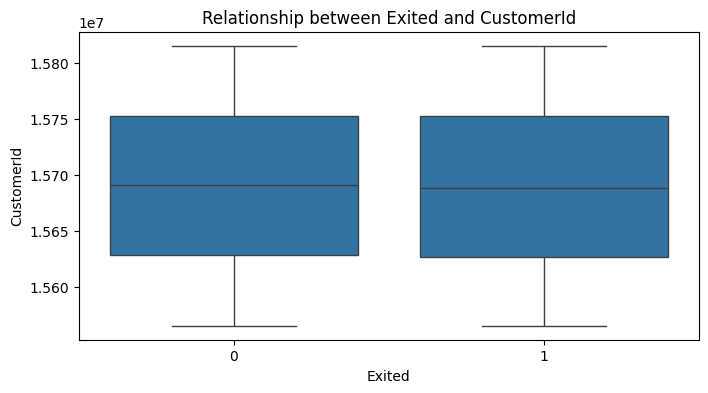

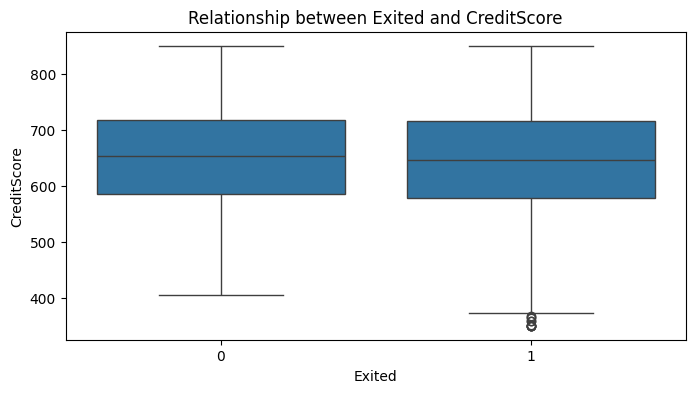

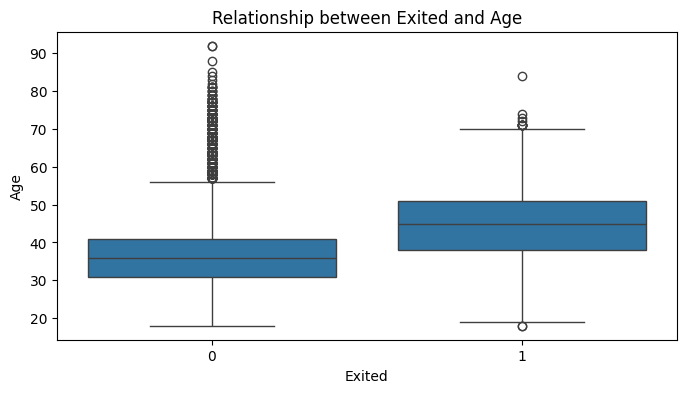

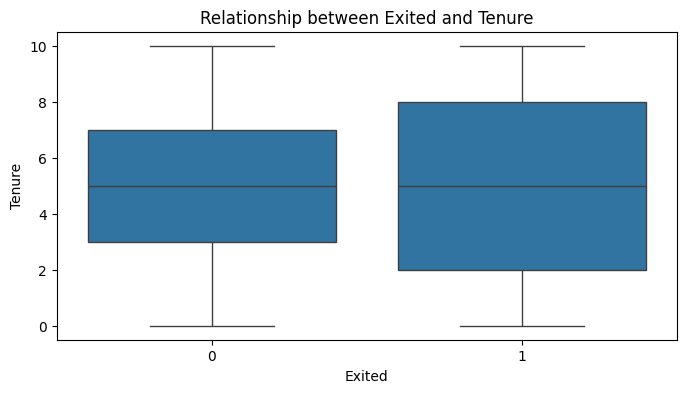

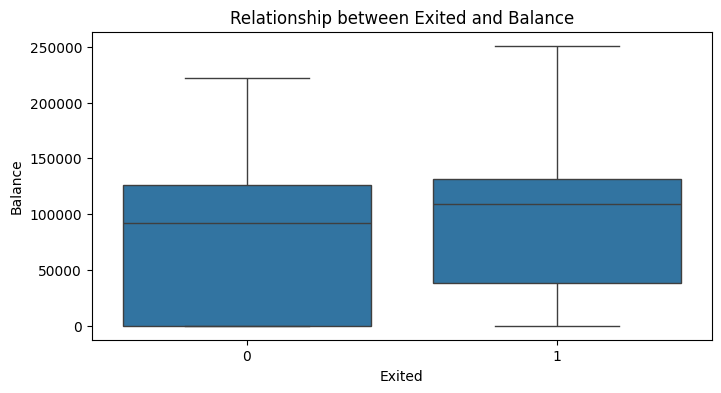

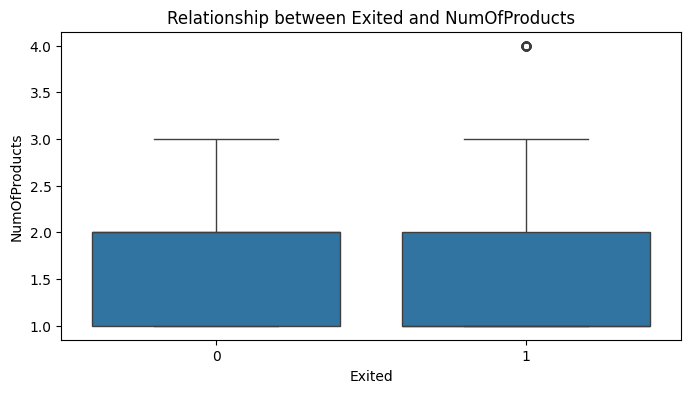

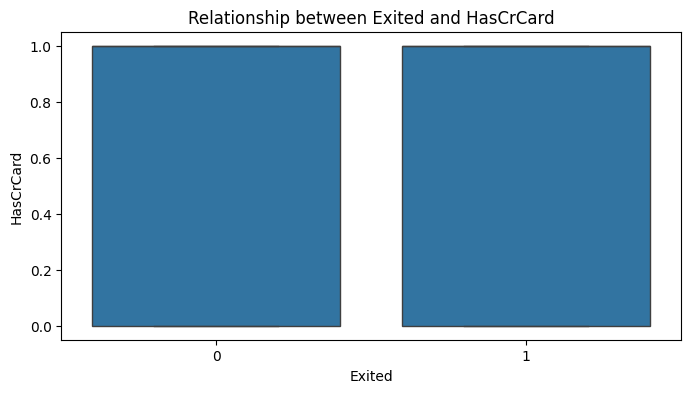

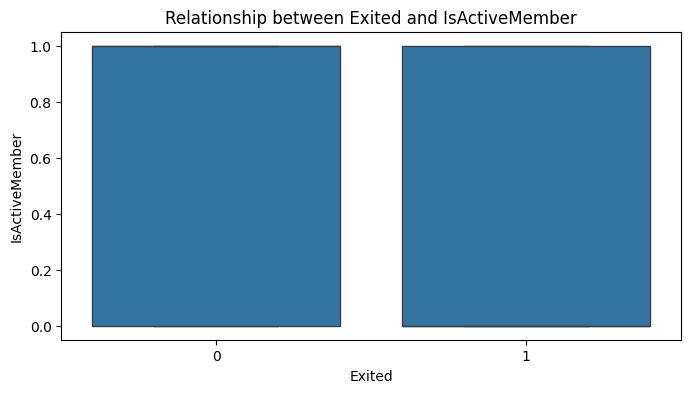

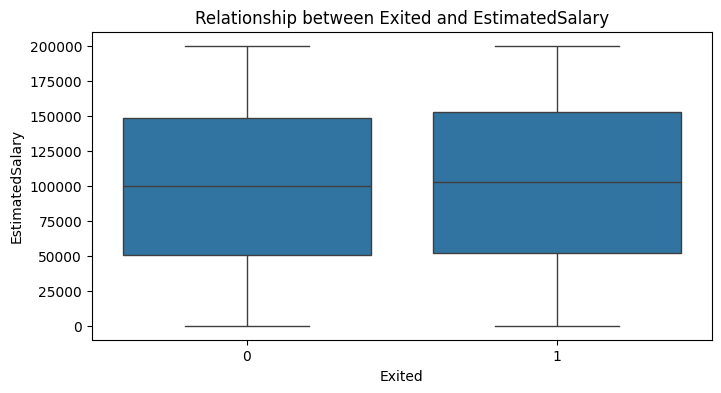

In [16]:
# Boxplots to show relationships with the target variable
if 'Exited' in df.columns:
    for col in numerical_cols:
        if col != 'Exited':
            plt.figure(figsize=(8, 4))
            sns.boxplot(data=df, x='Exited', y=col)
            plt.title(f'Relationship between Exited and {col}')
            plt.show()

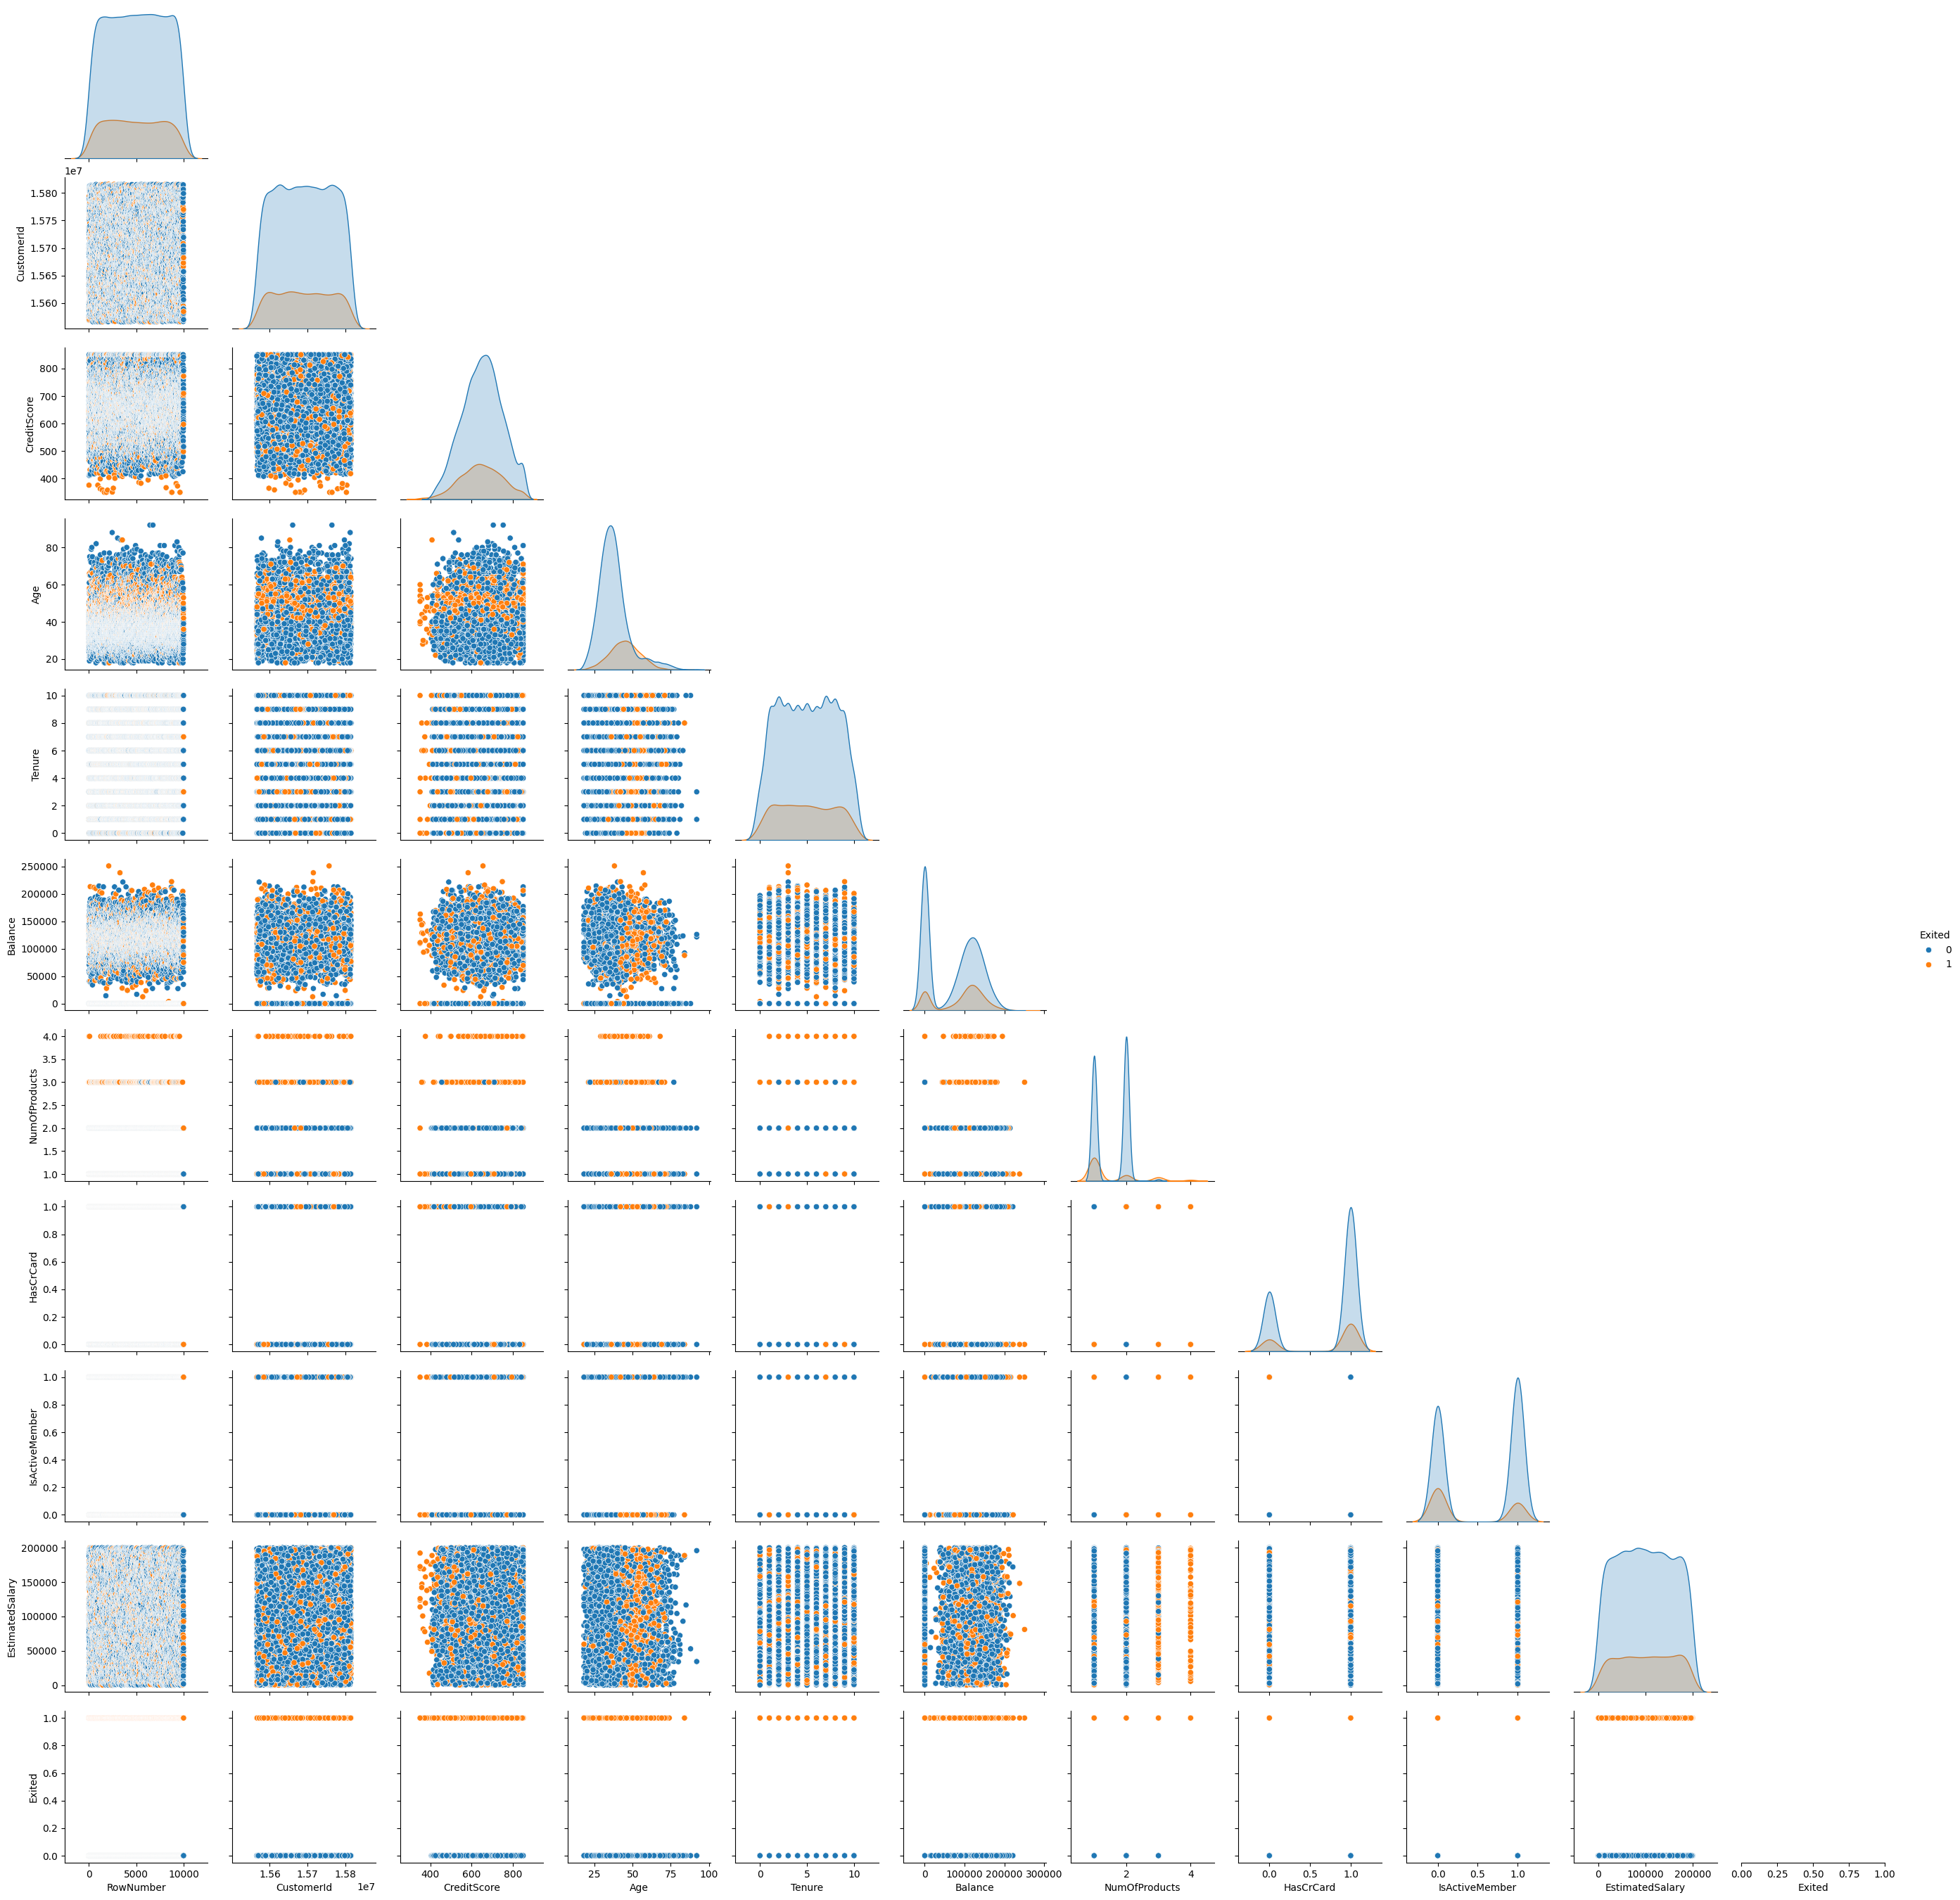


EDA Completed!


In [17]:
# Pairplot for multivariate analysis
if len(numerical_cols) > 2:
    sns.pairplot(df, vars=numerical_cols, hue='Exited', corner=True)
    plt.show()

print("\nEDA Completed!")

## Dropping unwanted columns and converting Categorical values into Numeric

In [19]:
df = pd.get_dummies(df)

df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,True,False,False,True,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,True,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,True,False,False,True,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,True,False,False,True,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,True,True,False


### Applying Machine Learning Models

In [6]:
X = df.drop(labels = ["Exited"],axis = 1)
y = df["Exited"]

In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fixing class imbalace using over sampling technique

In [8]:

class_counts = df['Exited'].value_counts()
print(class_counts)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [15]:
pip install imbalanced-learn

In [17]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Encode categorical features if present
label_encoder = LabelEncoder()

# Apply encoding to all object or categorical columns in X
X_encoded = X.copy()
for column in X.select_dtypes(include=['object']).columns:
    X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Before Resampling:", Counter(y_train))
print("After Resampling:", Counter(y_train_resampled))


Before Resampling: Counter({0: 5547, 1: 1453})
After Resampling: Counter({1: 5547, 0: 5547})


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# predictions on both training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5547
           1       0.00      0.00      0.00      1453

    accuracy                           0.79      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.79      0.70      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest model
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVC model
svc_model = SVC()

svc_model.fit(X_train, y_train)

# predictions on both training and testing sets
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5547
           1       0.00      0.00      0.00      1453

    accuracy                           0.79      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.79      0.70      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()

gradient_boosting_model.fit(X_train, y_train)

# predictions on both training and testing sets
y_train_pred = gradient_boosting_model.predict(X_train)
y_test_pred = gradient_boosting_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.82      0.48      0.60      1453

    accuracy                           0.87      7000
   macro avg       0.85      0.72      0.76      7000
weighted avg       0.86      0.87      0.86      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000

